# Sentiment Analysis with Deep Learning

This notebook demonstrates sentiment analysis using a neural network on the Sentiment dataset for the Advanced level deep learning task.

In [18]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [19]:
# Load the Sentiment Dataset
sentiment_df = pd.read_csv('../Data Set For Tasks/Data Set For Task/3) Sentiment dataset.csv')
print(sentiment_df.head())
print(sentiment_df['Sentiment'].value_counts())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [20]:
# Preprocessing
sentiment_df = sentiment_df[['Text', 'Sentiment']].dropna()
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].str.strip()

# Encode labels
label_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
sentiment_df['label'] = sentiment_df['Sentiment'].map(label_map)

# Drop rows with invalid labels
sentiment_df = sentiment_df.dropna(subset=['label'])
print(f"Number of samples after cleaning: {len(sentiment_df)}")
print(f"Class distribution:\n{sentiment_df['label'].value_counts().sort_index()}")

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentiment_df['Text'])
sequences = tokenizer.texts_to_sequences(sentiment_df['Text'])
X = pad_sequences(sequences, maxlen=100)
y = sentiment_df['label'].values.astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Number of samples after cleaning: 67
Class distribution:
label
0.0     4
1.0    18
2.0    45
Name: count, dtype: int64
Training set shape: (53, 100), Test set shape: (14, 100)


In [21]:
# Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

C:\Users\Lindikhaya Botha\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3810 - loss: 1.0860 - val_accuracy: 0.5455 - val_loss: 1.0619
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7143 - loss: 0.9804 - val_accuracy: 0.5455 - val_loss: 1.0207
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 0.7143 - loss: 0.8917 - val_accuracy: 0.5455 - val_loss: 0.9975
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.7143 - loss: 0.7542 - val_accuracy: 0.5455 - val_loss: 1.0492
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.7143 - loss: 0.8084 - val_accuracy: 0.5455 - val_loss: 1.0999
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.7143 - loss: 0.7027 - val_accuracy: 0.5455 - val_loss: 1.0552
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.7143 - loss: 0.7585 - val_accuracy: 0.5455 - val_loss: 0.9596
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.7143 - loss: 0.6673 - val_accuracy: 0.5455 - val_loss: 0.86

In [23]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = np.argmax(model.predict(X_test), axis=1)

# Get unique classes and map to names
unique_classes = sorted(np.unique(np.concatenate([y_test, y_pred])))
class_names = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
target_names = [class_names[int(c)] for c in unique_classes]

print(classification_report(y_test, y_pred, target_names=target_names, labels=unique_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.7857 - loss: 0.6123
Test Accuracy: 0.7857
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
              precision    recall  f1-score   support

     Neutral       1.00      0.40      0.57         5
    Positive       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



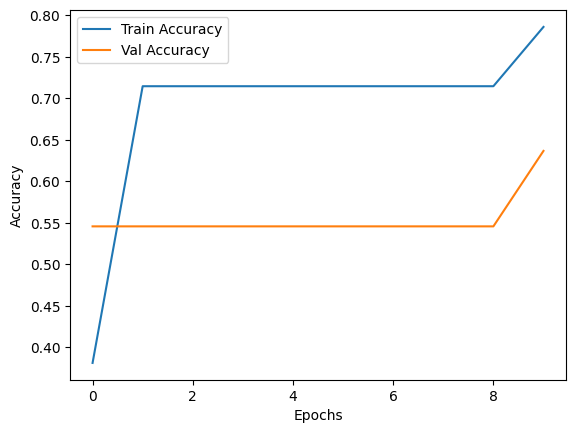

In [24]:
# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()